# Basic AI/DS lecture materials

The contents are as follows

** 1 | Application of principal component analysis (PCA) to two-dimensional distributed data **

** 2 | Application of PCA to Regression Problems **

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
random.seed(1) # Do not change the default random seed

## 1 | Application of principal component analysis (PCA) to two-dimensional distributed data
 　Create a data set of two-dimensional distributions in the form of circles, ellipses, and rings, and perform coordinate transformations of the data using PCA.


First, run the following cell to generate the two-dimensional distributions A, B, and C.

In [2]:
# data A（circle）, B（ellipse）, C（ring） generation
N = 200 # Number of data

A, B, C = [], [], []

# 円型の二次元分布データAを作成
# x=R*cos(θ)*s, y=R*sin(θ)s
# 0<s<1, 0<θ<2*π は乱数生成
R = 1 # 円の半径
for i in range(N):
    theta = 2 * np.pi * random.random()
    s = random.random() # x, yの縮小率
    x, y = R * np.cos(theta) * s, R * np.sin(theta) * s
    A.append((x, y))
A = np.array(A)
# 楕円型の二次元分布データBを作成
# x = (a*cos(t)*cos(θ)-b*sin(t)*sin(θ))*s + offset_x
# y = (a*sin(t)*cos(θ)+b*cos(t)*sin(θ))*s + offset_y
# 0<s<1, 0<θ<2*π は乱数生成
a, b = 2, 1# 回転前の楕円の横縦
t = np.pi/4 # 楕円の回転角
offset_x, offset_y = 0.3, 0.5 # 楕円の中心を少し原点からずらす
for i in range(N):
    theta = 2 * np.pi * random.random()
    s = random.random() # x, yの縮小率
    x = (a * np.cos(t) * np.cos(theta) - b * np.sin(t) * np.sin(theta)) * s + offset_x
    y = (a * np.sin(t) * np.cos(theta) + b * np.cos(t) * np.sin(theta)) * s + offset_y
    B.append((x, y))
B = np.array(B)
# リング型の二次元分布データCを作成
# x=R*cos(θ)*s, y=R*sin(θ)s
# 0.5<s<1, 0<θ<2*π は乱数生成
R = 1 # 円の半径
R_s = 0.5 # リングの内円の半径
for i in range(N):
    theta = 2 * np.pi * random.random()
    s = random.uniform(R_s/R, 1) # x, yの縮小率
    x,y = R * np.cos(theta) * s, R * np.sin(theta) * s
    C.append((x, y))
C = np.array(C)


Run the following cell to see the respective plots of the two-dimensional distributions A, B, and C.

D:\Softwares\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


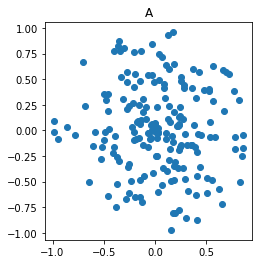

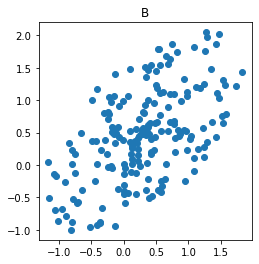

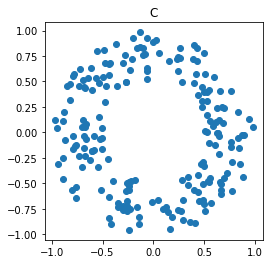

In [3]:
for data, title in zip([A, B, C], ["A", "B", "C"]):
    plt.scatter(data[:,0], data[:,1])
    plt.axes().set_aspect('equal')
    plt.title(title)
    plt.show()

In [4]:
print(A)
print(pca.transform(A))

[[ 5.62952735e-01  6.33425731e-01]
 [ 2.20482873e-02 -2.54114307e-01]
 [-4.49306186e-01  1.28906222e-02]
 [-4.57190227e-01 -6.42698702e-01]
 [ 2.35592157e-02  1.57652397e-02]
 [ 2.22084528e-01 -3.71437475e-01]
 [ 1.62337748e-04 -2.09978741e-03]
 [-6.79475742e-01  2.42760653e-01]
 [ 1.25763760e-01  9.36867208e-01]
 [ 2.49080839e-02 -1.77576580e-02]
 [ 5.34507420e-01  8.61932905e-02]
 [ 3.53679472e-01 -1.42223422e-01]
 [ 8.79374790e-02  4.12855184e-01]
 [ 2.18011304e-01  4.02276800e-02]
 [-4.58531499e-01  1.88623019e-01]
 [ 2.44911416e-02  2.29563812e-01]
 [ 8.95762798e-02  4.50789791e-01]
 [-5.31570652e-03  2.08218802e-02]
 [ 2.90979003e-01 -4.74312801e-01]
 [-1.16423891e-01 -1.44936598e-01]
 [ 8.59002898e-01 -4.02747228e-02]
 [ 2.41247064e-01  2.29098102e-01]
 [-1.26742689e-01 -6.99807133e-01]
 [ 3.88892141e-01 -1.64125629e-01]
 [ 3.23053894e-01 -5.87320810e-01]
 [-1.93358306e-01  5.54854516e-01]
 [ 6.25798777e-01 -5.69584025e-01]
 [-5.88677692e-01 -1.95508259e-02]
 [ 2.37050717e-01  5

NameError: name 'pca' is not defined

Transformation of data to new coordinate axes is performed by PCA.

In [5]:
# PCA automatically using sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(A)
print("eigenvectors:", pca.components_) 
print("eigenvalues: ", pca.explained_variance_ratio_)

eigenvectors: [[ 0.28945487 -0.95719166]
 [-0.95719166 -0.28945487]]
eigenvalues:  [0.55961392 0.44038608]


Run the following cell to see the principal component vector for data A

D:\Softwares\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


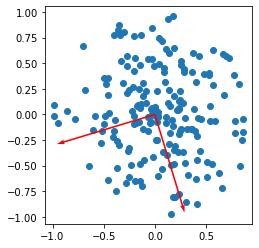

In [6]:
pcv_A = pca.components_
plt.scatter(A[:,0], A[:,1])
for v1, v2 in pcv_A:
    plt.quiver(0,0,v1,v2,angles='xy',scale_units='xy',scale=1, color="red")

plt.axes().set_aspect('equal')
plt.show()

In [7]:
pcv_B = pca_2.components_
plt.scatter(B[:,0], B[:,1])
for v1, v2 in pcv_B:
    plt.quiver(0,0,v1,v2,angles='xy',scale_units='xy',scale=1, color="red")

plt.axes().set_aspect('equal')
plt.show()

NameError: name 'pca_2' is not defined

In [ ]:
pcv_A

Transform data A using the "transform" method of PCA object

In [ ]:
pcaA = pca.transform(A)
pcaA

You can check the shape of the data A after mapping by executing the following cell

In [ ]:
plt.scatter(pcaA[:,0], pcaA[:,1])
plt.axes().set_aspect('equal')
plt.show()

---
##### Task 1
　For data B and C, perform the same principal component analysis with n_components = 2, and write the transformed data as pca_B and pca_C. Also, check the principal component vector and the data after the coordinate transformation.

In [8]:
# Complete this cell
pca_2 = PCA(n_components=2).fit(B)
pcv_B =  pca_2.components_ # Principal component vector of B
pcaB =  pca_2.transform(B)# B after coordinate transformation
eigenvalues_B = pca_2.explained_variance_ratio_ # eigenvaluese of PCA on B


pca_3 = PCA(n_components=2).fit(C)
pcv_C = pca_3.components_ # Principal component vector of C
pcaC =  pca_3.transform(C) # C after coordinate transformation
eigenvalues_C = pca_3.explained_variance_ratio_ # eigenvaluese of PCA on C

print("B eigenvalues: ", eigenvalues_B)
print("B eigenvectors", pcv_B)
print('\n\n\n')
print("C eigenvalues: ", eigenvalues_C)
print("C eigenvectors", pcv_C)

B eigenvalues:  [0.77501989 0.22498011]
B eigenvectors [[ 0.67096706  0.74148716]
 [-0.74148716  0.67096706]]




C eigenvalues:  [0.54512704 0.45487296]
C eigenvectors [[ 0.74067185 -0.67186696]
 [-0.67186696 -0.74067185]]


D:\Softwares\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


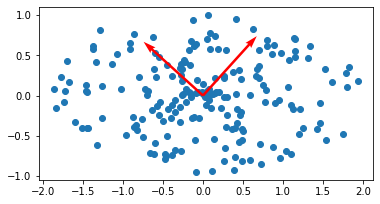

In [9]:
plt.scatter(pcaB[:,0], pcaB[:,1])
for v1, v2 in pcv_B:
    plt.quiver(0,0,v1,v2,angles='xy',scale_units='xy',scale=1, color="red")
plt.axes().set_aspect('equal')
plt.show()

D:\Softwares\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


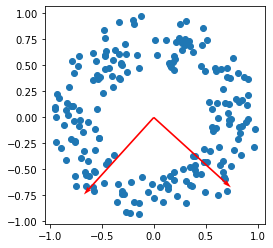

In [10]:
plt.scatter(pcaC[:,0], pcaC[:,1])
for v1, v2 in pcv_C:
    plt.quiver(0,0,v1,v2,angles='xy',scale_units='xy',scale=1, color="red")
plt.axes().set_aspect('equal')
plt.show()

# Complete this cell
pca = 
pcv_B =   # Principal component vector of B
pcaB =  # B after coordinate transformation
eigenvalues_B = # eigenvaluese of PCA on B


pca = 
pcv_C = # Principal component vector of C
pcaC =  # C after coordinate transformation
eigenvalues_C =  # eigenvaluese of PCA on C

print("B eigenvalues: ", eigenvalues_B)
print("B eigenvalues", pcv_B)

print("B eigenvalues: ", eigenvalues_C)
print("B eigenvalues", pcv_C)

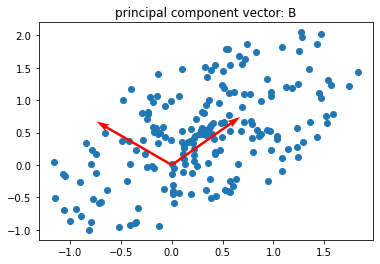

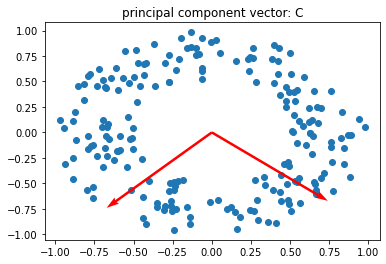

In [11]:
# Run this cell and check the principal component vector
for data, pcv, title in zip([B, C], [pcv_B, pcv_C], ["B", "C"]):
    plt.scatter(data[:,0], data[:,1])
    for v1, v2 in pcv:
        plt.quiver(0,0,v1,v2,angles='xy',scale_units='xy',scale=1, color="red")
        plt.title("principal component vector: "+ title)
    plt.show()

D:\Softwares\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


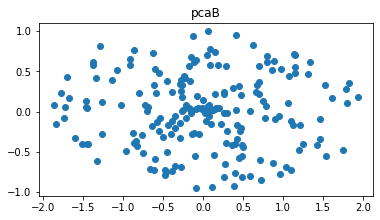

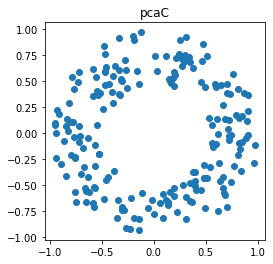

In [12]:
# Run this cell to see B, C after the coordinate transformation
for pca_data, title in zip([pcaB, pcaC], ["pcaB", "pcaC"]):
    plt.scatter(pca_data[:,0], pca_data[:,1])
    plt.axes().set_aspect('equal')
    plt.title(title)
    plt.show()

Note: You can also implement PCA by yourself using numpy as shown below. Note that you need to set the data center to 0 when you implement it yourself. In sklearn's PCA class, the data centering is done automatically.

In [40]:
# implement PCA by yourself using numpy
from numpy.linalg import eig
A_centered = A - np.mean(A, axis=0)
cov_matrix = np.cov(A_centered, rowvar=False)
eig_val, eig_vec = eig(cov_matrix)
n_components = 2
eig_index = np.argsort(eig_val)[::-1][:n_components]
eig_val = eig_val[eig_index]
eig_vec = eig_vec.T[eig_index]
#eig_vec # principal component vectors
print('eig_val_A: ', eig_val)
print('\n')
print('eig_vec_A: ', eig_vec)

eig_val_A:  [0.17043941 0.13412666]


eig_vec_A:  [[ 0.28945487 -0.95719166]
 [-0.95719166 -0.28945487]]


In [38]:
from numpy.linalg import eig
B_centered = B - np.mean(B,axis = 0)
cov_matrix_B = np.cov(B_centered, rowvar = False)
eig_val_B, eig_vec_B = eig(cov_matrix_B)
n_components = 2
eig_index_B = np.argsort(eig_val_B)[::-1][:n_components]
eig_val_B = eig_val_B[eig_index_B]
eig_vec_B = eig_vec_B.T[eig_index_B]
print('eig_val_B: ', eig_val_B)
print('\n')
print('eig_vec_B: ', eig_vec_B)

eig_val_B:  [0.69445922 0.2015942 ]


eig_vec_B:  [[-0.67096706 -0.74148716]
 [-0.74148716  0.67096706]]


In [39]:
from numpy.linalg import eig
C_centered = C - np.mean(C,axis = 0)
cov_matrix_C = np.cov(C_centered, rowvar = False)
eig_val_C, eig_vec_C = eig(cov_matrix_C)
n_components = 2
eig_index_C = np.argsort(eig_val_C)[::-1][:n_components]
eig_val_C = eig_val_C[eig_index_C]
eig_vec_C = eig_vec_C.T[eig_index_C]
print('eig_val_C: ', eig_val_C)
print('\n')
print('eig_vec_C: ', eig_vec_C)

eig_val_C:  [0.32443483 0.27071971]


eig_vec_C:  [[ 0.74067185 -0.67186696]
 [ 0.67186696  0.74067185]]


In [15]:
eig_val

array([0.17043941, 0.13412666])

In [16]:
eig_vec

array([[ 0.28945487, -0.95719166],
       [-0.95719166, -0.28945487]])

## 2 | Application of PCA to Regression Problems
   PCA is sometimes used as a data preprocessing method in regression problems. Here, we consider the problem of regressing a target variable of $y=x_{1}^{2}+x_{2}^{2}$.



In [17]:
# 目的変数の作成
y_A = A[:,0]**2 + A[:,1]**2
y_B = B[:,0]**2 + B[:,1]**2
y_C = C[:,0]**2 + C[:,1]**2

In [18]:
y_A

array([7.18143938e-01, 6.50602079e-02, 2.02042217e-01, 6.22084525e-01,
       8.03579425e-04, 1.87287335e-01, 4.43546072e-06, 5.20620018e-01,
       8.93536688e-01, 9.35747062e-04, 2.93127466e-01, 1.45316671e-01,
       1.78182403e-01, 4.91471949e-02, 2.45829779e-01, 5.32993600e-02,
       2.11235346e-01, 4.61807432e-04, 3.09641413e-01, 3.45611397e-02,
       7.39508032e-01, 1.10686086e-01, 5.05793733e-01, 1.78174319e-01,
       4.49309552e-01, 3.45250969e-01, 7.16050071e-01, 3.46923660e-01,
       5.89226948e-02, 1.71656090e-01, 3.01180081e-01, 4.54931136e-01,
       1.92687313e-01, 6.05972905e-01, 1.54649570e-01, 8.74678494e-04,
       4.94746363e-01, 3.51866938e-01, 2.90188489e-02, 9.64474522e-01,
       2.91186991e-01, 5.39057544e-02, 9.07194126e-01, 2.10801947e-01,
       3.00299955e-01, 3.25941591e-05, 6.73197132e-01, 5.48345303e-01,
       2.69027162e-01, 1.81553267e-01, 7.56917670e-01, 3.99357939e-02,
       2.35152364e-01, 1.19769926e-01, 3.88739098e-01, 2.09898490e-01,
      

In [19]:
np.array([A,B,C]).shape

(3, 200, 2)

In [20]:
np.array([y_A,y_B,y_C]).shape

(3, 200)

In [21]:
np.array(['A','B','C']).shape

(3,)

In [22]:
[y_A,y_B,y_C]

[array([7.18143938e-01, 6.50602079e-02, 2.02042217e-01, 6.22084525e-01,
        8.03579425e-04, 1.87287335e-01, 4.43546072e-06, 5.20620018e-01,
        8.93536688e-01, 9.35747062e-04, 2.93127466e-01, 1.45316671e-01,
        1.78182403e-01, 4.91471949e-02, 2.45829779e-01, 5.32993600e-02,
        2.11235346e-01, 4.61807432e-04, 3.09641413e-01, 3.45611397e-02,
        7.39508032e-01, 1.10686086e-01, 5.05793733e-01, 1.78174319e-01,
        4.49309552e-01, 3.45250969e-01, 7.16050071e-01, 3.46923660e-01,
        5.89226948e-02, 1.71656090e-01, 3.01180081e-01, 4.54931136e-01,
        1.92687313e-01, 6.05972905e-01, 1.54649570e-01, 8.74678494e-04,
        4.94746363e-01, 3.51866938e-01, 2.90188489e-02, 9.64474522e-01,
        2.91186991e-01, 5.39057544e-02, 9.07194126e-01, 2.10801947e-01,
        3.00299955e-01, 3.25941591e-05, 6.73197132e-01, 5.48345303e-01,
        2.69027162e-01, 1.81553267e-01, 7.56917670e-01, 3.99357939e-02,
        2.35152364e-01, 1.19769926e-01, 3.88739098e-01, 2.098984

In [23]:
zip1 = zip([A,B,C],[y_A,y_B,y_C],['A','B','C'])
print(zip([A,B,C],[y_A,y_B,y_C],['A','B','C']))


Run the following cell to see the value of $y=x_{1}^{2}+x_{2}^{2}$ for x1 and x2 in datasets A, B, and C respectively

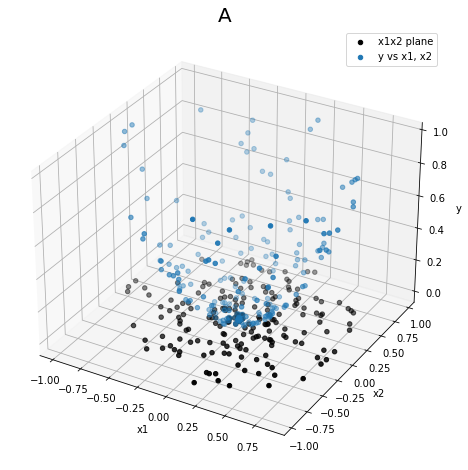

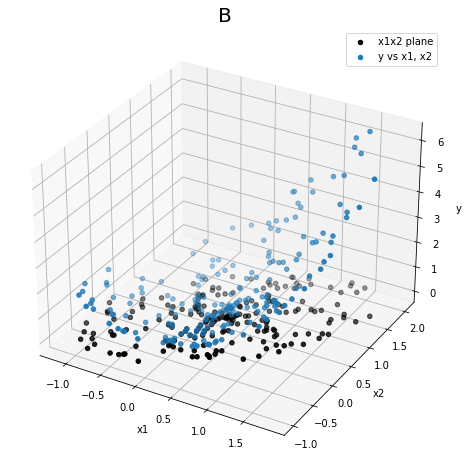

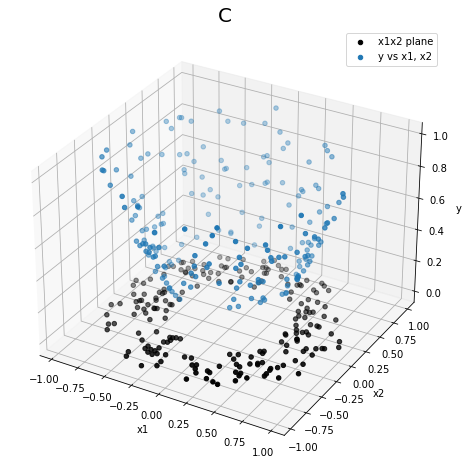

In [24]:
for data, y, title in zip([A, B, C], [y_A, y_B, y_C], ["A", "B", "C"]):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.scatter(data[:,0], data[:,1], 0, color="black", label="x1x2 plane")
    ax.scatter(data[:,0], data[:,1], y, label="y vs x1, x2")
    ax.set_title(title, size = 20)
    plt.legend()
    plt.show()

Before using PCA, we first create a regression model using the untransformed x1 and x2. Here, we create a data set that includes x1^2,  x2^2 and the constant data for the bias parameter.

In [25]:
# データセットの作成
X_A = np.array([
    [1 for x in range(len(A))],
    A[:,0]**2,
    A[:,1]**2
]).T


X_B = np.array([
    [1 for x in range(len(B))],
    B[:,0]**2,
    B[:,1]**2
]).T

X_C = np.array([
    [1 for x in range(len(C))],
    C[:,0]**2,
    C[:,1]**2
]).T

Split the dataset into training data and test data

In [26]:
from sklearn.model_selection import train_test_split

# Do not change the default random seed
X_A_train, X_A_test, y_A_train, y_A_test = train_test_split(X_A, y_A, random_state=1)
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, random_state=1)
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, y_C, random_state=1)
print("train data: ", len(y_A_train))
print("test data: ", len(y_A_test))

train data:  150
test data:  50


Create a linear model using train data.

In [27]:
from sklearn.linear_model import LinearRegression

reg_A = LinearRegression().fit(X_A_train, y_A_train)
reg_B = LinearRegression().fit(X_B_train, y_B_train)
reg_C = LinearRegression().fit(X_C_train, y_C_train)

The fitted model can be used to predict the value of y by giving X to the "prediction" method as follows.
~~~
reg_A.prediction(X_A_test)
~~~

Let's check the prediction error of each linear model by MAE (Mean Absolute Error).

In [28]:
from sklearn.metrics import mean_absolute_error
pred_A = reg_A.predict(X_A_test)
pred_B = reg_B.predict(X_B_test)
pred_C = reg_C.predict(X_C_test)
print("reg_A score: ", mean_absolute_error(y_A_test, pred_A))
print("reg_B score: ", mean_absolute_error(y_B_test, pred_B))
print("reg_C score: ", mean_absolute_error(y_C_test, pred_C))

reg_A score:  7.994784847163705e-17
reg_B score:  3.434752482434078e-16
reg_C score:  2.1316282072803005e-16


By running the following cell, we can see a plot of the actual y versus the model prediction on the test data.

In [29]:
X_A_test[:,1]

array([2.62998301e-01, 4.81516072e-03, 1.51988299e-01, 9.92123671e-03,
       7.25863650e-02, 4.97617523e-02, 6.24251816e-02, 5.55036643e-04,
       1.47833393e-02, 2.70607121e-02, 1.62147266e-01, 8.46687799e-02,
       1.25089169e-01, 1.57859899e-08, 2.13850085e-02, 9.63101633e-04,
       2.74644702e-01, 8.71015622e-04, 4.90085949e-01, 5.66875971e-02,
       3.26960422e-02, 8.02390990e-03, 4.38510698e-03, 2.10156901e-02,
       3.84687404e-02, 4.52628321e-03, 1.78699267e-02, 5.61930426e-02,
       5.96608153e-07, 3.46541425e-01, 3.12563702e-01, 7.42829879e-01,
       2.42828739e-01, 1.62139977e-01, 9.06888587e-02, 3.13805582e-02,
       7.21845896e-04, 4.35426582e-02, 4.28893784e-02, 6.58504504e-02,
       9.62042267e-01, 2.57960008e-01, 7.17688121e-03, 2.10251136e-01,
       5.11063963e-02, 1.35545224e-02, 2.44864184e-02, 9.64283731e-01,
       7.21056906e-02, 5.39680661e-02])

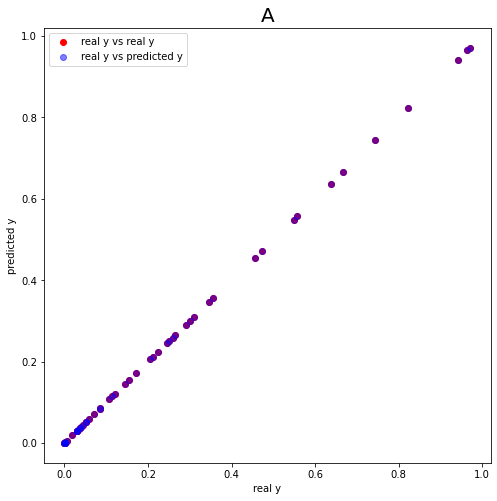

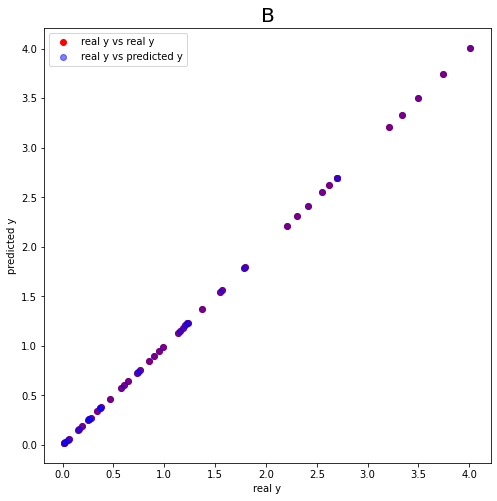

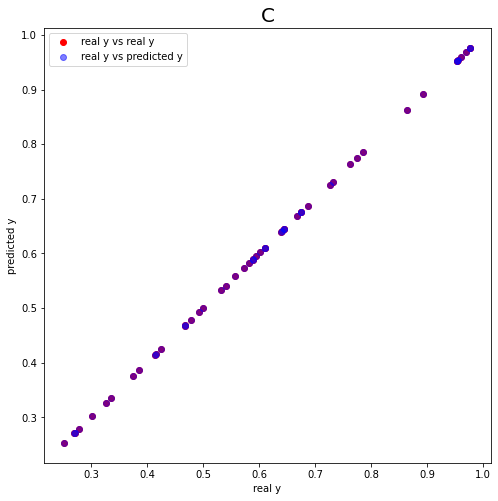

In [30]:
for y, pred, title in zip([y_A_test, y_B_test, y_C_test], [pred_A, pred_B, pred_C], ["A", "B", "C"]):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel("real y")
    ax.set_ylabel("predicted y")
    ax.scatter(y, y, label="real y vs real y",color= 'r',alpha=1)
    ax.scatter(y, pred, label="real y vs predicted y",color='b',alpha=0.5)
    ax.set_title(title, size = 20)
    plt.legend()
    plt.show()

Also, in the following cell, you can see the parameter values of the optimized linear model.

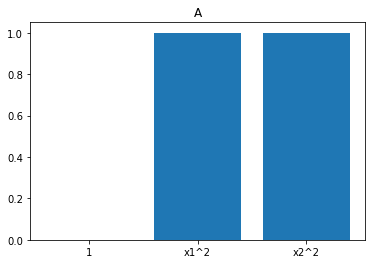

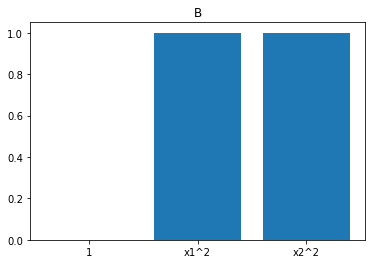

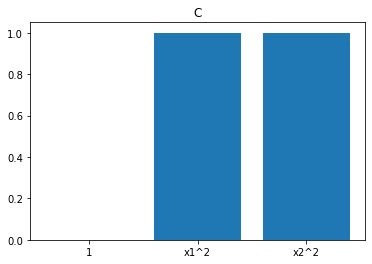

In [31]:
for reg, title in zip([reg_A, reg_B, reg_C], ["A", "B", "C"]):
    plt.bar(range(3), reg.coef_, tick_label=["1", "x1^2", "x2^2"])
    plt.title(title)
    plt.show()

---
##### Task 2
　Perform a regression of y using the data pca_A, pca_B, and pca_C, which are coordinate transformations of data A, B, and C in PCA.
 
 Name the variables in the regression model as reg_pcaX (X = A, B, C) and create data with [1, ξ1^2, ξ2^2] as rows as input data to the model (ksi1, ksi2 are the data after coordinate transformation with PCA)


In [32]:
A[:,0].shape

(200,)

In [33]:
X_A = np.array([
    [1 for x in range(len(A))],
    A[:,0]**2,
    A[:,1]**2
]).T


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_pcaA = np.array([
    [1 for x in range(len(pcaA))],
    pcaA[:,0]**2,
    pcaA[:,1]**2]
).T

X_pcaB = np.array([
    [1 for x in range(len(pcaB))],
    pcaB[:,0]**2,
    pcaB[:,1]**2]
).T

X_pcaC = np.array([
    [1 for x in range(len(pcaC))],
    pcaC[:,0]**2,
    pcaC[:,1]**2]
).T

y_pcaA = pcaA[:,0]**2 + pcaA[:,1]**2
y_pcaB = pcaB[:,0]**2 + pcaB[:,1]**2
y_pcaC = pcaC[:,0]**2 + pcaC[:,1]**2

X_pcaA_train, X_pcaA_test, y_pcaA_train, y_pcaA_test = train_test_split(X_pcaA,y_pcaA, random_state=1)
X_pcaB_train, X_pcaB_test, y_pcaB_train, y_pcaB_test = train_test_split(X_pcaB,y_pcaB, random_state=1)
X_pcaC_train, X_pcaC_test, y_pcaC_train, y_pcaC_test = train_test_split(X_pcaC,y_pcaC, random_state=1)

reg_pcaA = LinearRegression().fit(X_pcaA_train, y_pcaA_train)
reg_pcaB = LinearRegression().fit(X_pcaB_train, y_pcaB_train)
reg_pcaC = LinearRegression().fit(X_pcaC_train, y_pcaC_train)

pred_pcaA = reg_pcaA.predict(X_pcaA_test)
pred_pcaB = reg_pcaB.predict(X_pcaB_test)
pred_pcaC = reg_pcaC.predict(X_pcaC_test)

print("red_pcaA score: ", mean_absolute_error(y_pcaC_test, pred_pcaA))
print("reg_pcaB score: ", mean_absolute_error(y_pcaB_test, pred_pcaB))
print("reg_pcaC score: ", mean_absolute_error(y_pcaC_test, pred_pcaC))

# Run this cell to plot the predicted y vs. real y in the test data
for y, pred, title in zip([y_pcaA_test, y_pcaB_test, y_pcaC_test], [pred_pcaA, pred_pcaB, pred_pcaC], ["A", "B", "C"]):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel("real y")
    ax.set_ylabel("predicted y")
    ax.scatter(y, y, label="real y vs real y",color='r')
    ax.scatter(y, pred, label="real y vs predicted y",color = 'b', alpha=0.5)
    ax.set_title(title, size = 20)
    plt.legend()
    plt.show()

NameError: name 'pcaA' is not defined

# Complete this cell

# Creating Data
X_pcaA = 

X_pcaB = 

X_pcaC = 

# Split the data set into training and test data
# Do not change the default random seed
X_pcaA_train, X_pcaA_test, y_pcaA_train, y_pcaA_test = train_test_split(X_pcaA, y_A, random_state=1)
X_pcaB_train, X_pcaB_test, y_pcaB_train, y_pcaB_test = train_test_split(X_pcaB, y_B, random_state=1)
X_pcaC_train, X_pcaC_test, y_pcaC_train, y_pcaC_test = train_test_split(X_pcaC, y_C, random_state=1)

# Create a regression model
reg_pcaA = 
reg_pcaB = 
reg_pcaC = 

# Using regression models to predict test data
pred_pcaA = 
pred_pcaB = 
pred_pcaC = 

In [35]:
# Run this cell to see the prediction error of the regression model
print("reg_pcaA score: ", mean_absolute_error(y_pcaA_test, pred_pcaA))
print("reg_pcaB score: ", mean_absolute_error(y_pcaB_test, pred_pcaB))
print("reg_pcaC score: ", mean_absolute_error(y_pcaC_test, pred_pcaC))

NameError: name 'y_pcaA_test' is not defined

In [36]:
# Run this cell to plot the predicted y vs. real y in the test data
for y, pred, title in zip([y_pcaA_test, y_pcaB_test, y_pcaC_test], [pred_pcaA, pred_pcaB, pred_pcaC], ["A", "B", "C"]):
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111)
    ax.set_xlabel("real y")
    ax.set_ylabel("predicted y")
    ax.scatter(y, y, label="real y vs real y")
    ax.scatter(y, pred, label="real y vs predicted y")
    ax.set_title(title, size = 20)
    plt.legend()
    plt.show()

NameError: name 'y_pcaA_test' is not defined

In [ ]:
# Run this cell to check the parameter values of the optimized linear model
for reg, title in zip([reg_pcaA, reg_pcaB, reg_pcaC], ["pcaA", "pcaB", "pcaC"]):
    plt.bar(range(3), reg.coef_, tick_label=["1", "xi1^2", "xi2^2"])
    plt.title(title)
    plt.show()